# **DISEÑO DE UNA RED NEURONAL CONVOLUCIONAL**


> ## **CLASIFICACIÓN DE DÍGITOS**

> #### **BASE DE DATOS: MNIST**

#### ÁNGELES GARRIDO

***MNIST*** es una base de datos compuesta por un conjunto de entrenamiento de 60.000 imágenes y un conjunto de test de 10.000 imágenes, asociadas a 10 clases diferentes de dígitos manuscritos.  

#### Importamos librerías más usadas como: NumPy, Pandas, MatPlotLib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#### Importamos las librerías necesarias para el diseño de modelos CNN

In [ ]:
# -- Librerías de Keras

# import keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, Conv2D, MaxPooling2D
# from keras.utils import np_utils obsoleto
from keras.utils import to_categorical
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras import backend as K


# Librería de la base de datos de imágenes MNIST
from keras.datasets import mnist

# Librería "display" para visualizacion de las imágenes pixeladas
from IPython.display import display
import time


#### Cargamos la base de datos MNIST para reconocimiento de dígitos

##### Es un conjunto de datos que viene ya particionado en dos conjuntos de ENTRENAMIENTO y TEST

In [ ]:
# Dataset MNIST - Reconocimiento de caracteres

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Visualizamos el formato de los conjuntos de TRAINING y TEST
print("Formato del conjunto x_train: {}".format(x_train.shape))
print("Formato del conjunto y_train: {}".format(y_train.shape))
print()
print("Formato del conjunto x_test: {}".format(x_test.shape))
print("Formato del conjunto y_test: {}".format(y_test.shape))

Formato del conjunto x_train: (60000, 28, 28)
Formato del conjunto y_train: (60000,)

Formato del conjunto x_test: (10000, 28, 28)
Formato del conjunto y_test: (10000,)


#### Visualizamos la imagen pixelada 28 x 28

In [ ]:
# Seleccionamos la primera imagen del conjunto (primer dígito)
single = x_train[0]
print("Formato de la imagen: {}".format(single.shape))

Formato de la imagen: (28, 28)


In [ ]:
# Representamos la imagen pixelada de 28 x 28 píxeles
display(pd.DataFrame(single.reshape(28,28)))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


#### Visualizamos la primera imagen y su clase

##### *%matplotlib inline* es una función de iPython. La salida de los comandos de trazado se muestra en línea dentro de las interfaces como el cuaderno Jupyter, directamente debajo de la celda de código que lo produjo.

Image (#0): Which is digit '5'


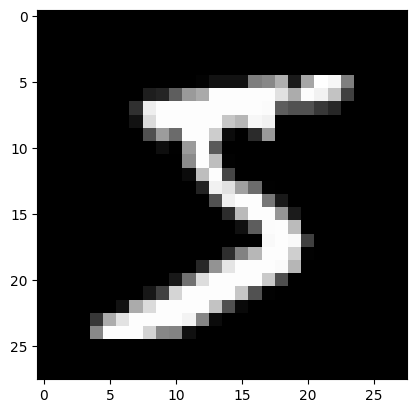

In [ ]:
# Visualización como imagen
%matplotlib inline

# Seleccionamos un dígito (posición de una imagen)
digit = 0 # Cambiar número para elegir otro dígito
a = x_train[digit]

# Visualización en escala de grises
plt.imshow(a, cmap='gray', interpolation='nearest')
print("Image (#{}): Which is digit '{}'".format(digit,y_train[digit]))

Imagen (#0): Representa el dígito '5'


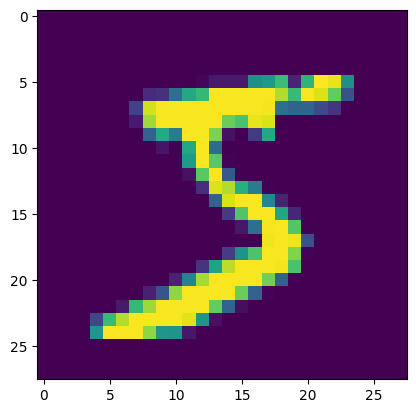

In [ ]:
# Visualización en color
plt.imshow(a, interpolation='nearest')
print("Imagen (#{}): Representa el dígito '{}'".format(digit,y_train[digit]))


#### Definición de parámetros

In [ ]:
num_classes = 10

# Dimensiones de la imagen de entrada
img_rows, img_cols = 28, 28

#### Comprobamos nuevamente el formato de "x_train" y "x_test"

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


#### Cambiamos el formato de las imágenes de los conjuntos de entrenamiento y test

##### Las matrices de entrada tienen que tener un formato específico para entrar en el modelo

In [ ]:
# Si el formato de las imágenes sólo tiene un canal (escala de grises)
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
# en otro caso
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

##### Comprobamos el nuevo formato de "x_train" y "x_test"

In [ ]:
print("Conjunto de Training: {}".format(x_train.shape[0]), 'imágenes')
print(x_train.shape)

print()
print("Conjunto de TEST: {}".format(x_test.shape[0]), 'imágenes')
print(x_test.shape)

Conjunto de Training: 60000 imágenes
(60000, 28, 28, 1)

Conjunto de TEST: 10000 imágenes
(10000, 28, 28, 1)


In [ ]:
# Píxeles de la fila 10 de la primera imagen
print(x_train[0][10])

[[  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [ 14]
 [  1]
 [154]
 [253]
 [ 90]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]]


#### Damos formato a los píxeles de las imágenes de coma flotante de simple precisión

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#### Normalizamos los píxeles entre [0,1] para que no tengan unos más valor que otros por tener simplemente un número más alto

In [ ]:
x_train /= 255
x_test /= 255

#### Visualizamos nuevamente los píxeles de la fila 10 de la primera imagen

In [ ]:
print(x_train[0][10])

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.05490196]
 [0.00392157]
 [0.6039216 ]
 [0.99215686]
 [0.3529412 ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


## Convierte los vectores de clase en matrices de clases binarias

In [ ]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
# Etiqueta de la primera imagen
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#### Diseño de un modelo CNN

In [ ]:
# Modelo para CLASIFICACIÓN DE IMÁGENES

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))      # input_shape = (28, 28, 1)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

#### Visualizamos la ARQUITECTURA DE LA RED CNN

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

#### Compilamos el modelo

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#ENTRENAMIENTO

#### Entrenamos el modelo

In [ ]:
batch_size = 128
epochs = 10

In [ ]:
import time

start_time = time.time()

history_modelo = model.fit(x_train, y_train,
                 batch_size = batch_size,
                 epochs = epochs,
                 verbose=2,      # visualización del progreso de entrenamiento
                 validation_data=(x_test, y_test))

elapsed_time = time.time() - start_time

Epoch 1/10
469/469 - 71s - loss: 0.2567 - accuracy: 0.9215 - val_loss: 0.0572 - val_accuracy: 0.9812 - 71s/epoch - 151ms/step
Epoch 2/10
469/469 - 46s - loss: 0.0706 - accuracy: 0.9786 - val_loss: 0.0397 - val_accuracy: 0.9863 - 46s/epoch - 99ms/step
Epoch 3/10
469/469 - 48s - loss: 0.0530 - accuracy: 0.9839 - val_loss: 0.0316 - val_accuracy: 0.9886 - 48s/epoch - 102ms/step
Epoch 4/10
469/469 - 49s - loss: 0.0428 - accuracy: 0.9866 - val_loss: 0.0274 - val_accuracy: 0.9907 - 49s/epoch - 103ms/step
Epoch 5/10
469/469 - 45s - loss: 0.0352 - accuracy: 0.9887 - val_loss: 0.0251 - val_accuracy: 0.9917 - 45s/epoch - 95ms/step
Epoch 6/10
469/469 - 46s - loss: 0.0313 - accuracy: 0.9901 - val_loss: 0.0231 - val_accuracy: 0.9926 - 46s/epoch - 98ms/step
Epoch 7/10
469/469 - 46s - loss: 0.0256 - accuracy: 0.9917 - val_loss: 0.0265 - val_accuracy: 0.9911 - 46s/epoch - 97ms/step
Epoch 8/10
469/469 - 47s - loss: 0.0234 - accuracy: 0.9925 - val_loss: 0.0231 - val_accuracy: 0.9920 - 47s/epoch - 101ms/s

In [ ]:
# Tiempo de entrenamiento

print('Tiempo estimado de entrenamiento (seg):', np.around(elapsed_time))
print('Tiempo estimado de entrenamiento (min):', np.around(elapsed_time/60))

Tiempo estimado de entrenamiento (seg): 510.0
Tiempo estimado de entrenamiento (min): 9.0


**ATENCIÓN**: Con lotes de 128 imágenes y 2 épocas el tiempo de ejecución es de 6 minutos

**ATENCIÓN**: Con lotes de 128 imágenes y 2 épocas el tiempo de ejecución **CON GPU** es de 40 segundos

In [ ]:
history_dict = history_modelo.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<Figure size 640x480 with 0 Axes>

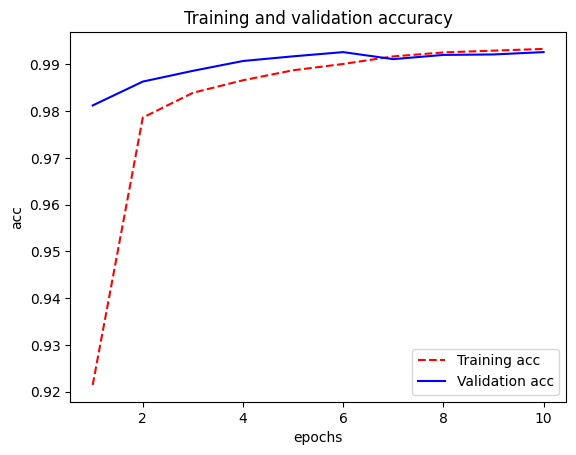

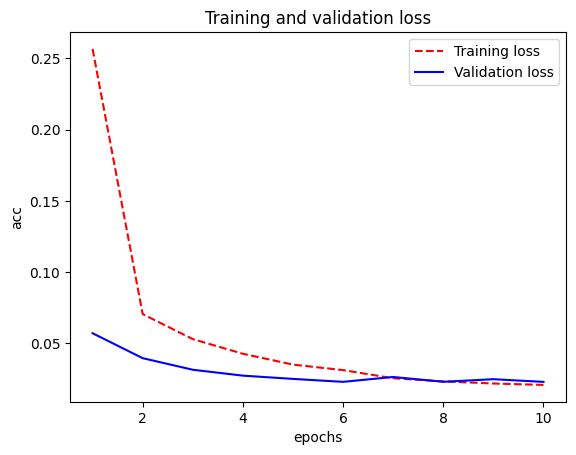

<Figure size 640x480 with 0 Axes>

In [ ]:
acc      = history_modelo.history[     'accuracy' ]
val_acc  = history_modelo.history[ 'val_accuracy' ]
loss     = history_modelo.history[         'loss' ]
val_loss = history_modelo.history[     'val_loss' ]

# Vector con el número de épocas

epochs   = range(1,len(acc)+1,1)


# REPRESENTACIÓN GRÁFICA

plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     loss, 'r--', label='Training loss'  )
plt.plot ( epochs, val_loss , 'b' , label='Validation loss' )
plt.title ('Training and validation loss'   )
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

# EVALUCIÓN DEL CONJUNTO DE TEST

#### Evaluación del modelo y tiempo de ejecución

> ##### Entrenamiento: validando con el conjunto de test
> ##### Evaluación del modelo para el conjunto de test
> ##### Tiempo de ejecución

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)

print(    'Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Test loss: 0.023059086874127388
Test accuracy: 0.9926000237464905


#### Predecimos el conjunto de TEST con el modelo que hemos diseñado

##### np.newaxis simplemente aumenta una dimensión a la matriz de la imagen

In [ ]:
pred = model.predict(x_test[np.newaxis,1])

1/1 [==============================] - 0s 128ms/step


#### Buscamos los índices de los valores más altos dentro de un array.
#### Donde el argumento axis= significa:

> ##### axis=0: a lo largo de una fila
> #### axis=1: a lo largo de una columna

In [ ]:
prediccion = pred.argmax(axis=1)

In [ ]:
prediccion

array([2])

La predicción es:  2


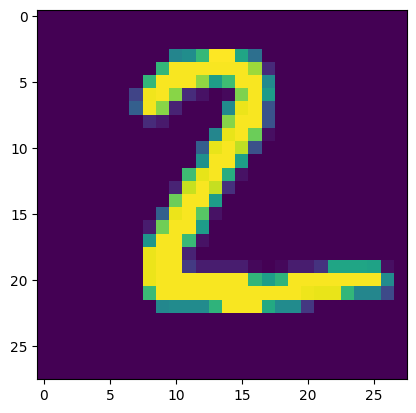

In [ ]:
print('La predicción es: ', prediccion[0])  # tiene la posición de la clase que ha tenido mayor probabilidad
img = (x_test[1]*255).reshape((28,28)).astype('uint8')
plt.imshow(img)
plt.show()

#### PREDICCIÓN de algunas imágenes y la visualización de la IMAGEN

1/1 [==============================] - 0s 21ms/step
La predicción es:  1


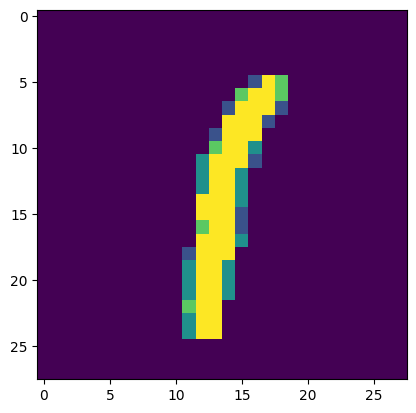

1/1 [==============================] - 0s 24ms/step
La predicción es:  4


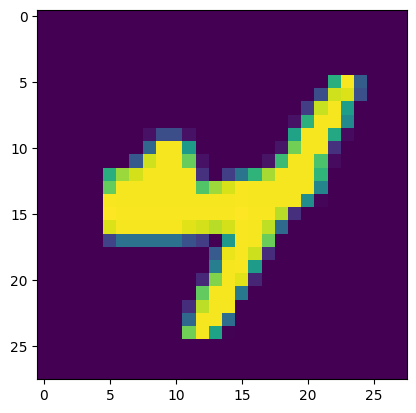

1/1 [==============================] - 0s 27ms/step
La predicción es:  7


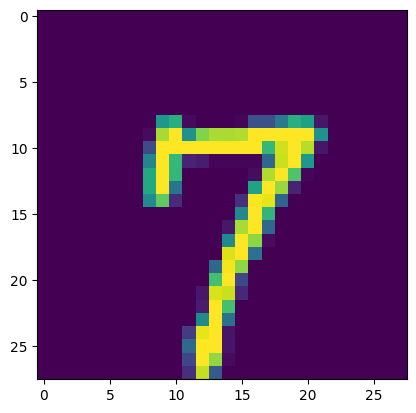

1/1 [==============================] - 0s 23ms/step
La predicción es:  0


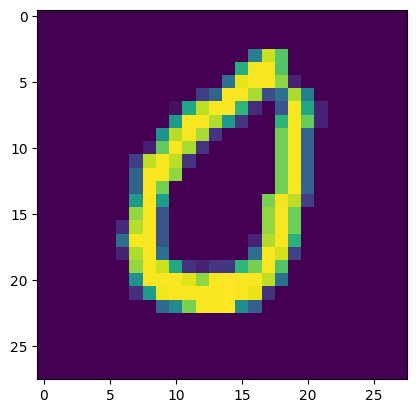

1/1 [==============================] - 0s 21ms/step
La predicción es:  2


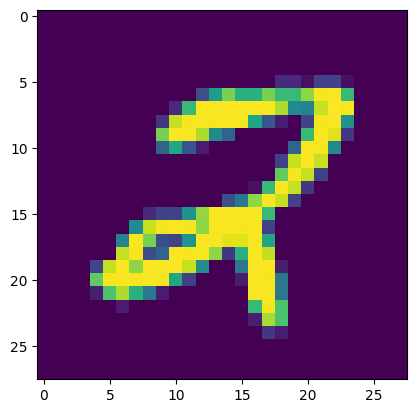

In [ ]:
# Visualizamos las predicciones y sus imágenes
for i in np.random.choice(np.arange(0,len(y_test)), size=(5,)):
  pred = model.predict(x_test[np.newaxis, i])
  prediccion = pred.argmax(axis=1)
  img = (x_test[i]*255).reshape((28,28)).astype('uint8')
  print('La predicción es: ', prediccion[0])
  plt.imshow(img)
  plt.show()

# CAMBIAMOS LA CONFIGURACIÓN DE CUADERNO A **GPU**

#### Volvemos a ejecutar todo el notebook para ver diferencias y tiempos de ejecución


#### Información sobre la máquina GPU

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found
